## Dataset
For this assignment, I'll be using a US ETF Funds Prices Dataset from Yahoo! Finance. The dataset was taken from Kaggle:

https://www.kaggle.com/stefanoleone992/mutual-funds-and-etfs?select=ETF+prices.csv

The dataset simply contains the changing prices of ETF funds in the US.

In [1]:
%run MLTemplate.ipynb

In [2]:
from tensorflow.keras.losses import binary_crossentropy as BCE, CategoricalCrossentropy as CCE
from scipy.stats import wasserstein_distance as wasd
from tqdm import tqdm
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Embedding as embed, multiply

In [4]:
df = loadfile()

What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:E:\Deep Learning\Assignments\GANs and AE\ETF prices.csv


In [4]:
df.head()

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100


In [5]:
description(df,10)

The columns and rows of the dataset are (3866030, 8)
The number of values in the dataset is 30928240
  fund_symbol  price_date   open   high    low  close  adj_close  volume
0         AAA  2020-09-09  25.10  25.12  25.07  25.07      24.85   17300
1         AAA  2020-09-10  25.06  25.07  25.05  25.07      24.85   23500
2         AAA  2020-09-11  25.04  25.05  25.02  25.03      24.81   33400
3         AAA  2020-09-14  25.01  25.06  25.01  25.02      24.80   13100
4         AAA  2020-09-15  25.02  25.03  25.01  25.01      24.79   12100
5         AAA  2020-09-16  24.97  24.98  24.97  24.97      24.75   14100
6         AAA  2020-09-17  24.99  25.00  24.98  24.98      24.76   15200
7         AAA  2020-09-18  24.97  24.98  24.97  24.98      24.76    5300
8         AAA  2020-09-21  24.99  24.99  24.98  24.98      24.76    8600
9         AAA  2020-09-22  24.98  24.99  24.98  24.98      24.76    8100
        fund_symbol  price_date   open   high    low  close  adj_close  volume
3866020         Z

,open,high,low,close,adj_close,volume
count,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06
mean,1.202537e+05,1.262811e+05,1.149734e+05,1.196726e+05,1.196579e+05,1.026745e+06
std,1.149917e+07,1.208270e+07,1.097204e+07,1.143655e+07,1.143655e+07,1.275733e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.486000e+01,2.494000e+01,2.476000e+01,2.485000e+01,2.229000e+01,3.553000e+03
50%,3.388000e+01,3.406000e+01,3.368000e+01,3.387000e+01,3.108000e+01,2.133900e+04
75%,5.417000e+01,5.441000e+01,5.390000e+01,5.416000e+01,5.007000e+01,1.269000e+05
max,2.656750e+09,2.808750e+09,2.609750e+09,2.808750e+09,2.808750e+09,2.987062e+09


In [6]:
null(df)

fund_symbol    0
price_date     0
open           0
high           0
low            0
close          0
adj_close      0
volume         0
dtype: int64

## Preparing Dataset

In [5]:
#encoding fund_symbol to make dataset completely numeric, aside from the price_date data
le = preprocessing.LabelEncoder()
le.fit(df['fund_symbol'])
df['fund_symbol'] = le.transform(df['fund_symbol'])

In [6]:
df

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,0,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,0,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,0,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,0,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,0,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
...,...,...,...,...,...,...,...,...
3866025,2309,2021-11-23,26.81,27.21,26.30,26.35,26.35,190900
3866026,2309,2021-11-24,26.79,26.96,26.57,26.69,26.69,109000
3866027,2309,2021-11-26,26.67,28.14,26.67,27.72,27.72,205500
3866028,2309,2021-11-29,27.89,28.56,27.80,28.27,28.27,411900


In [7]:
df.to_csv("dataset.csv")

In [8]:
df['fund_symbol'].value_counts()
#Slicing dataset to select rows with 'fund_symbol' 1948

1948    7263
587     6472
586     6472
589     6472
380     6007
        ... 
146       98
976       95
2199      94
1349      92
1234      89
Name: fund_symbol, Length: 2310, dtype: int64

In [7]:
AEdata = df[df['fund_symbol']==1948]

In [8]:
AEdata

,fund_symbol,price_date,open,high,low,close,adj_close,volume
3262244,1948,1993-01-29,43.97,43.97,43.75,43.94,25.80,1003200
3262245,1948,1993-02-01,43.97,44.25,43.97,44.25,25.98,480500
3262246,1948,1993-02-02,44.22,44.38,44.12,44.34,26.04,201300
3262247,1948,1993-02-03,44.41,44.84,44.38,44.81,26.31,529400
3262248,1948,1993-02-04,44.97,45.09,44.47,45.00,26.42,531500
...,...,...,...,...,...,...,...,...
3269502,1948,2021-11-23,467.22,469.10,464.45,468.19,468.19,73206500
3269503,1948,2021-11-24,466.06,469.57,465.19,469.44,469.44,61858800
3269504,1948,2021-11-26,462.34,463.90,457.77,458.97,458.97,112669600
3269505,1948,2021-11-29,464.07,466.56,461.73,464.60,464.60,86268800


In [9]:
#selecting relevant dataset columns
AEdata = AEdata[['open', 'high', 'low', 'adj_close']]

In [10]:
AEdata

,open,high,low,adj_close
3262244,43.97,43.97,43.75,25.80
3262245,43.97,44.25,43.97,25.98
3262246,44.22,44.38,44.12,26.04
3262247,44.41,44.84,44.38,26.31
3262248,44.97,45.09,44.47,26.42
...,...,...,...,...
3269502,467.22,469.10,464.45,468.19
3269503,466.06,469.57,465.19,469.44
3269504,462.34,463.90,457.77,458.97
3269505,464.07,466.56,461.73,464.60


<AxesSubplot:xlabel='open'>

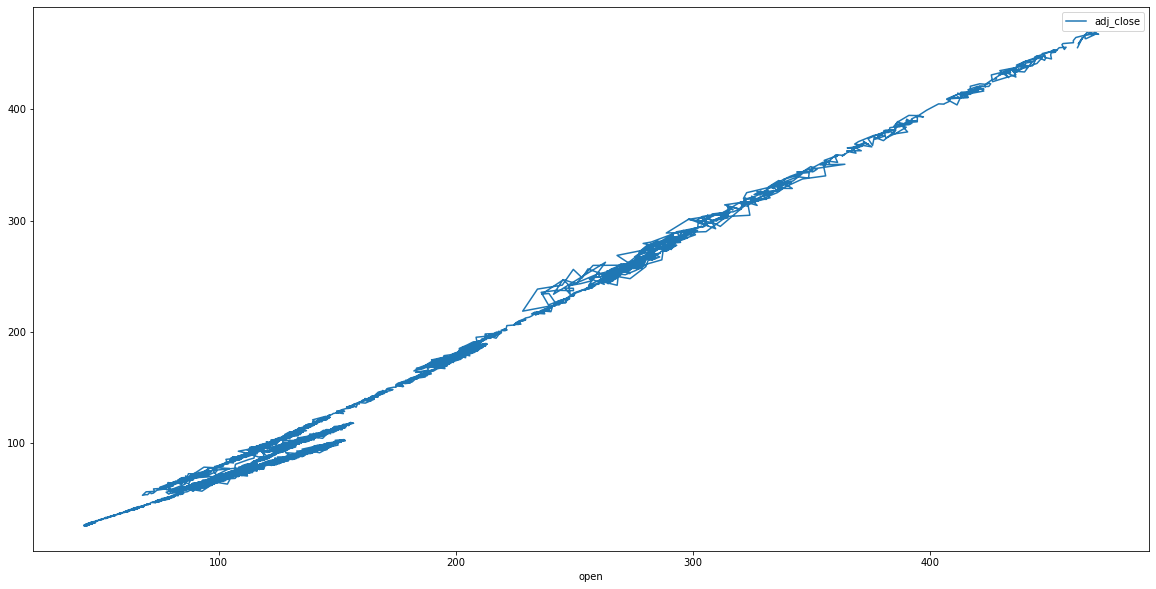

In [11]:
#plotting data
AEdata.plot(x = 'open', y= 'adj_close')

In [12]:
#Apply train-test-split
X_train, X_test, y_train, y_test = splitting(AEdata)

What is the label columnadj_close


In [13]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [14]:
X_train.shape, y_train.shape

((4866, 3), (4866,))

## Scaling Data

In [31]:
#Defining scaling function
def scaler(X_train, X_test):
    scaler = MMS()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, scaler

In [16]:
scX_train, scX_test, scalermodel = scaler(X_train, X_test)

In [17]:
scX_train

array([[0.00417488, 0.00402424, 0.00389955],
       [0.07873628, 0.07858964, 0.07620569],
       [0.13737217, 0.13829812, 0.13751791],
       ...,
       [0.31262314, 0.31283779, 0.31377293],
       [0.35404353, 0.35621534, 0.35575184],
       [0.05577446, 0.05530989, 0.05630858]])

In [18]:
scX_test

array([[0.12731025, 0.13067078, 0.12671193],
       [0.58577259, 0.58419316, 0.5849327 ],
       [0.40456422, 0.40544208, 0.40381498],
       ...,
       [0.09942302, 0.10123769, 0.09793512],
       [0.16190543, 0.16344962, 0.16138505],
       [0.05959752, 0.06003603, 0.06009068]])

In [19]:
#Creating validation set
scX_train, scX_val, y_train, y_val = tts(scX_train, y_train, test_size = 0.33)

## Defining a Vanilla Autoencoder/Decoder Function

In [26]:
def AE(n_inputs):
    #defining visible layer/encoder
    vlayer = Input(shape = (n_inputs,))
    e = Dense(n_inputs*2)(vlayer)
    e = BN()(e)
    e = relu()(e)
    #defining bottleneck
    n_bottleneck = n_inputs
    blayer = Dense(n_bottleneck)(e)
    #defining decoder
    d = Dense(n_inputs*2)(blayer)
    d = BN()(d)
    d = relu()(d)
    #output
    out = Dense(n_inputs, activation = 'linear')(d)
    model = Model(inputs = vlayer, outputs = out)
    model.compile(optimizer = 'adam', loss = 'mse')
    plot_model(model, 'autoencoder.png', show_shapes=True)
    return model

def history(model, X_train, Xval):
    return model.fit(X_train, X_train, epochs = 100, batch_size = 32, verbose = 2, validation_data = (Xval, Xval))

def evalmodel(modelfit, model, X_train, X_test):
    plt.title('Mean Squared Error')
    plt.plot(modelfit.history['loss'], label = 'training data')
    plt.plot(modelfit.history['val_loss'], label = 'validation data')
    plt.legend()
    plt.show()
    
    predictions = model.predict(X_test)
    return predictions

In [27]:
newmodel = AE(scX_train.shape[1])

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [28]:
modelfit = history(newmodel, scX_train, scX_val)

Epoch 1/100
102/102 - 4s - loss: 0.1355 - val_loss: 0.0685 - 4s/epoch - 40ms/step
Epoch 2/100
102/102 - 1s - loss: 0.0238 - val_loss: 0.0383 - 716ms/epoch - 7ms/step
Epoch 3/100
102/102 - 1s - loss: 0.0142 - val_loss: 0.0217 - 640ms/epoch - 6ms/step
Epoch 4/100
102/102 - 1s - loss: 0.0103 - val_loss: 0.0121 - 644ms/epoch - 6ms/step
Epoch 5/100
102/102 - 1s - loss: 0.0078 - val_loss: 0.0081 - 656ms/epoch - 6ms/step
Epoch 6/100
102/102 - 1s - loss: 0.0055 - val_loss: 0.0071 - 660ms/epoch - 6ms/step
Epoch 7/100
102/102 - 1s - loss: 0.0043 - val_loss: 0.0047 - 656ms/epoch - 6ms/step
Epoch 8/100
102/102 - 1s - loss: 0.0037 - val_loss: 0.0035 - 672ms/epoch - 7ms/step
Epoch 9/100
102/102 - 1s - loss: 0.0032 - val_loss: 0.0027 - 656ms/epoch - 6ms/step
Epoch 10/100
102/102 - 1s - loss: 0.0034 - val_loss: 0.0026 - 656ms/epoch - 6ms/step
Epoch 11/100
102/102 - 1s - loss: 0.0022 - val_loss: 0.0021 - 664ms/epoch - 7ms/step
Epoch 12/100
102/102 - 1s - loss: 0.0027 - val_loss: 0.0019 - 636ms/epoch - 

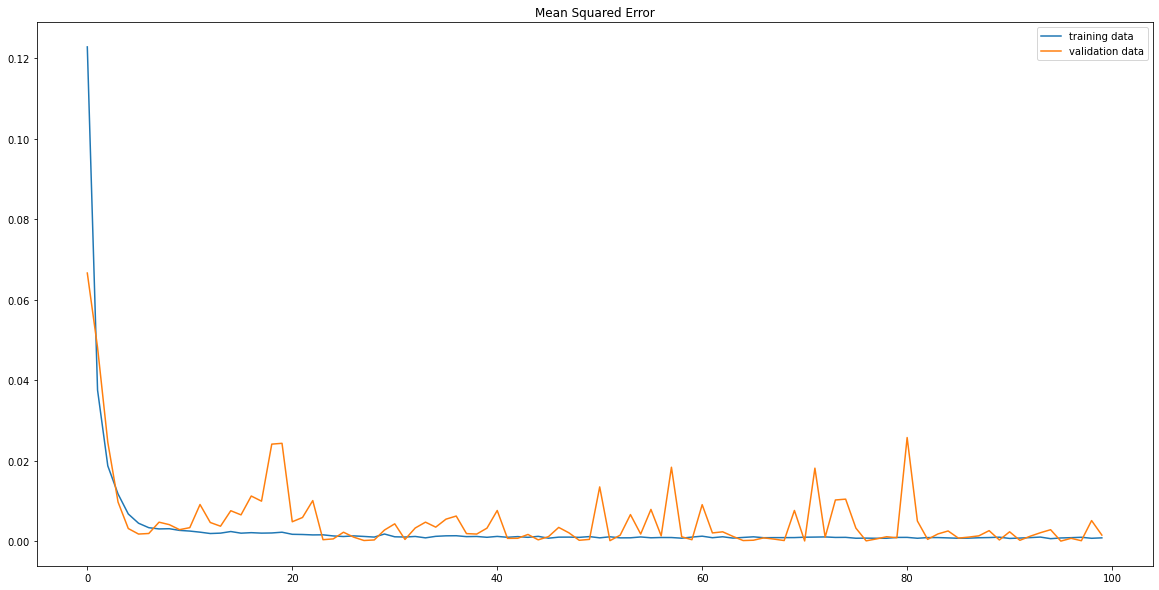

In [53]:
predictions = evalmodel(modelfit, newmodel, X_train, X_test)

# Using Autoencoder Model to Train a Different Predictive Model

In [32]:
y_train = y_train.reshape((len(y_train), 1))
y_test = y_test.reshape((len(y_test), 1))
y_train, y_test, scaler = scaler(y_train,y_test)

In [33]:
y_train, y_test

(array([[0.19913469],
        [0.07339388],
        [0.11997206],
        ...,
        [0.17353584],
        [0.33447507],
        [0.19579963]]),
 array([[0.0888298 ],
        [0.56862789],
        [0.38968385],
        ...,
        [0.07634585],
        [0.1464272 ],
        [0.04175586]]))

In [34]:
#defining model
def pretrainedaemodel(X_train, y_train, X_test, y_test, scaler):
    model = SVR()
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    yhat = yhat.reshape(len(yhat),1)
    yhat = scaler.inverse_transform(yhat)
    y_test = scaler.inverse_transform(y_test)
    score = MAE(y_test, yhat)
    print("The mean absolute error is",score,'.')

In [35]:
pretrainedaemodel(scX_train, y_train, scX_test, y_test, scaler)

The mean absolute error is 0.05596999370320474 .


In [36]:
#Using encoded data on the pretrained model to achieve better results
X_trainencode = newmodel.predict(scX_train)
X_testencode = newmodel.predict(scX_test)

In [37]:
pretrainedaemodel(X_trainencode, y_train, X_testencode, y_test, scaler)
#Though the difference made is minimal, it's significant
#enough to use encoded data in future problems since it clearly performs
#better. 

The mean absolute error is 0.0467705798149825 .


## Defining a Variational Autoencoder/Decoder Function


In [38]:
import imageio
import glob 
import os
import time
import cv2
from IPython import display
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow import GradientTape

In [39]:
#creating dimensions
import math
dim = scX_train.shape[1]
inter_dim = 64
latent_dim = 2
dim, inter_dim, latent_dim

(3, 64, 2)

In [40]:
#creating variational autoencoder layers

#Part 1: Creating Encoder
#visible layer or input
vlayer = Input(shape = (dim,))
#hidden layer
hidden = Dense(inter_dim, activation = 'relu')(vlayer)
#2nd hidden layer
z_mean = Dense(latent_dim)(hidden)
#third hidden layer
z_log_var = Dense(latent_dim)(hidden)

In [41]:
#Creating sampling layer
def sampling(inputs):
    z_mean, z_log_var = inputs
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean = 0, stddev = 0.1)
    return z_mean + K.exp(z_log_var)*epsilon

In [42]:
z = Lambda(sampling)([z_mean, z_log_var])

In [43]:
encoder = Model(vlayer, [z_mean, z_log_var, z])

In [44]:
encoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 64)           256         ['input_2[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 2)            130         ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 2)            130         ['dense_4[0][0]']                
                                                                                            

In [45]:
#Part 2: Creating Decoder
#input layer
lat_in = Input(shape = (latent_dim,))
#hidden layer
x = Dense(inter_dim, activation = 'relu')(lat_in)
#output layer
out = Dense(dim, activation = 'sigmoid')(x)

decoder = Model(lat_in, out)


In [46]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_7 (Dense)             (None, 64)                192       
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [47]:
#Combining Encoder and Decoder
output = decoder(encoder(vlayer)[2])

In [48]:
VarAE = Model(vlayer, output)

In [49]:
reconstruction_loss = BCE(vlayer, output)
reconstruction_loss *= dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
VarAE.add_loss(vae_loss)

In [50]:
VarAE.compile(optimizer = 'adam')

In [51]:
VarAE.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 model_1 (Functional)           [(None, 2),          516         ['input_2[0][0]']                
                                 (None, 2),                                                       
                                 (None, 2)]                                                       
                                                                                                  
 model_2 (Functional)           (None, 3)            387         ['model_1[0][2]']                
                                                                                            

In [52]:
scX_train.shape[1]

3

In [55]:
#Fitting Variational Autoencoder model to training data
modelfit = VarAE.fit(scX_train, scX_train, epochs = 25, batch_size = 16, validation_data = (scX_test, scX_test))

Epoch 1/25
204/204 [==============================] - 2s 7ms/step - loss: 1.4583 - val_loss: 1.4462
Epoch 2/25
204/204 [==============================] - 2s 7ms/step - loss: 1.4581 - val_loss: 1.4453
Epoch 3/25
204/204 [==============================] - 1s 7ms/step - loss: 1.4590 - val_loss: 1.4506
Epoch 4/25
204/204 [==============================] - 1s 7ms/step - loss: 1.4599 - val_loss: 1.4457
Epoch 5/25
204/204 [==============================] - 1s 7ms/step - loss: 1.4583 - val_loss: 1.4483
Epoch 6/25
204/204 [==============================] - 1s 7ms/step - loss: 1.4584 - val_loss: 1.4494
Epoch 7/25
204/204 [==============================] - 1s 7ms/step - loss: 1.4582 - val_loss: 1.4462
Epoch 8/25
204/204 [==============================] - 1s 7ms/step - loss: 1.4576 - val_loss: 1.4458
Epoch 9/25
204/204 [==============================] - 1s 7ms/step - loss: 1.4579 - val_loss: 1.4447
Epoch 10/25
204/204 [==============================] - 1s 7ms/step - loss: 1.4583 - val_loss: 1.4455

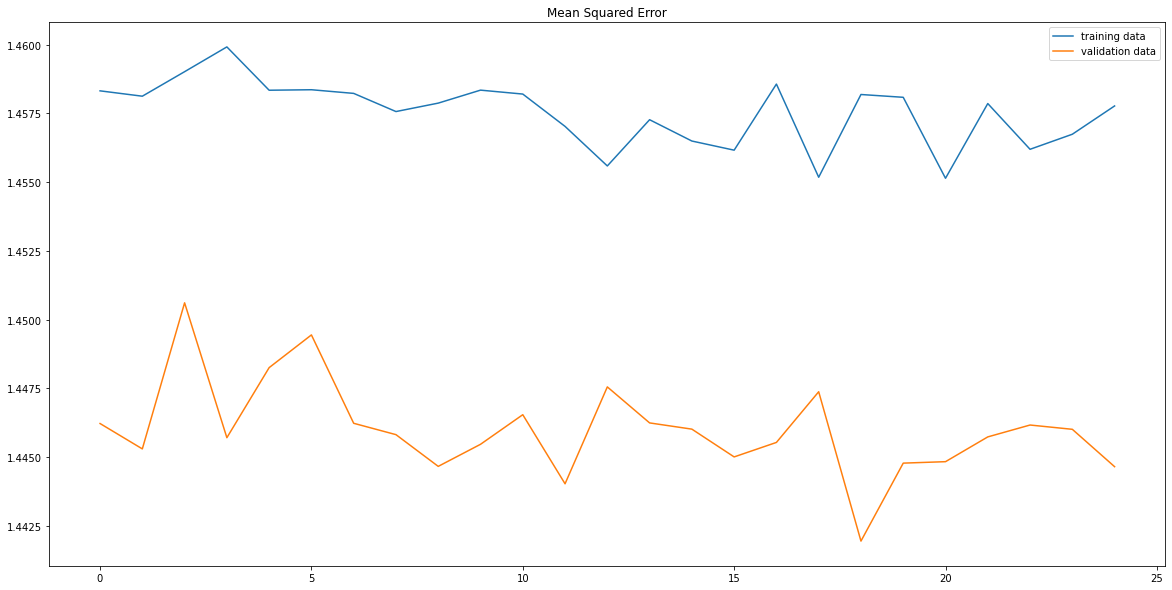

In [56]:
predictions = evalmodel(modelfit, VarAE, X_train, X_test)

# Designing GANs

In [67]:
class gantrain():
    def __init__(self):
        self.latent_dim = 32
        self.out_shape = 29
        self.num_classes = 2
        self.clip_value = 0.01
        optimizer = Adam(0.0002, 0.5)
        #optimizer = RMSprop(lr=0.00005)

        # build discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # build generator
        self.generator = self.build_generator()

        # generating new data samples
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        gen_samples = self.generator([noise, label])

        self.discriminator.trainable = False

        # passing gen samples through disc. 
        valid = self.discriminator([gen_samples, label])

        # combining both models
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
                              optimizer=optimizer,
                             metrics=['accuracy'])
        self.combined.summary()

    def wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)

    def build_generator(self):
        init = RandomNormal(mean=0.0, stddev=0.02)
        model = Sequential()

        model.add(Dense(128, input_dim=self.latent_dim))
        #model.add(Dropout(0.2))
        model.add(lrelu(alpha=0.2))
        model.add(BN(momentum=0.8))

        model.add(Dense(256))
        #model.add(Dropout(0.2))
        model.add(lrelu(alpha=0.2))
        model.add(BN(momentum=0.8))

        model.add(Dense(512))
        #model.add(Dropout(0.2))
        model.add(lrelu(alpha=0.2))
        model.add(BN(momentum=0.8))

        model.add(Dense(self.out_shape, activation='tanh'))
        model.summary()

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(embed(self.num_classes, self.latent_dim)(label))
        
        model_input = multiply([noise, label_embedding])
        gen_sample = model(model_input)

        return Model([noise, label], gen_sample, name="Generator")

    
    def build_discriminator(self):
        init = RandomNormal(mean=0.0, stddev=0.02)
        model = Sequential()

        model.add(Dense(512, input_dim=self.out_shape, kernel_initializer=init))
        model.add(lrelu(alpha=0.2))
        
        model.add(Dense(256, kernel_initializer=init))
        model.add(lrelu(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Dense(128, kernel_initializer=init))
        model.add(lrelu(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        
        gen_sample = Input(shape=(self.out_shape,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(embed(self.num_classes, self.out_shape)(label))

        model_input = multiply([gen_sample, label_embedding])
        validity = model(model_input)

        return Model(inputs=[gen_sample, label], outputs=validity, name="Discriminator")


    def train(self, X_train, y_train, pos_index, neg_index, epochs, batch_size=32, sample_interval=50):

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            
            #  Train Discriminator with 8 sample from postivite class and rest with negative class
            idx1 = np.random.choice(pos_index, 8)
            idx0 = np.random.choice(neg_index, batch_size-8)
            idx = np.concatenate((idx1, idx0))
            samples, labels = X_train[idx], y_train[idx]
            samples, labels = np.random.shuffle(samples, labels)
            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a half batch of new labels
            gen_samples = self.generator.predict([noise, labels])

            # label smoothing
            if epoch < epochs//1.5:
                valid_smooth = (valid+0.1)-(np.random.random(valid.shape)*0.1)
                fake_smooth = (fake-0.1)+(np.random.random(fake.shape)*0.1)
            else:
                valid_smooth = valid 
                fake_smooth = fake
                
            # Train the discriminator
            self.discriminator.trainable = True
            d_loss_real = self.discriminator.train_on_batch([samples, labels], valid_smooth)
            d_loss_fake = self.discriminator.train_on_batch([gen_samples, labels], fake_smooth)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train Generator
            # Condition on labels
            self.discriminator.trainable = False
            sampled_labels = np.random.randint(0, 2, batch_size).reshape(-1, 1)
            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Plot the progress
            if (epoch+1)%sample_interval==0:
                print (f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

In [68]:
GAN = gantrain()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               15360     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 128)              

In [69]:
y_train = y_train.reshape(-1,1)

In [70]:

iterations = 15000
batch_size = 100
sample_interval = 750
pos_index = np.where(y_train==1)[0]
neg_index = np.where(y_train==0)[0]

GAN.train(X_train, y_train, pos_index, neg_index, 2000, batch_size=32, sample_interval=50)
#unusual problem with the function. 

TypeError: RandomState.shuffle() takes exactly one argument (2 given)

Using both the Autoencoders and Variational Autoencoders supplied and us with good models which reduced the error overall. However, the Variational Autoencoder performed worse than the vanilla autoencoder. 

The GAN Model, though generated, didn't supply us with a result due to coding errors. 